# Metro ML Position Task

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Example-Data" data-toc-modified-id="Example-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example Data</a></span></li><li><span><a href="#Original-Data" data-toc-modified-id="Original-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Original Data</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Preprocessing-Pipeline" data-toc-modified-id="Preprocessing-Pipeline-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocessing Pipeline</a></span></li><li><span><a href="#Linear-Regression-(single-input)" data-toc-modified-id="Linear-Regression-(single-input)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Linear Regression (single input)</a></span></li><li><span><a href="#Linear-Regression-(multiple-input)" data-toc-modified-id="Linear-Regression-(multiple-input)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Linear Regression (multiple input)</a></span></li><li><span><a href="#DNN-Regression" data-toc-modified-id="DNN-Regression-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>DNN Regression</a></span></li></ul></div>

## Introduction

## Libraries

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

## Example Data

In [2]:
raw_df = pd.read_csv('example_data.csv')
raw_df

,Unnamed: 0,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,9,8,390.0,190.0,3850.0,8.5,70,0,0,1
1,25,8,360.0,215.0,4615.0,14.0,70,0,0,1
2,28,8,304.0,193.0,4732.0,18.5,70,0,0,1
3,31,4,113.0,95.0,2228.0,14.0,71,0,1,0
4,33,6,232.0,100.0,2634.0,13.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...,...
73,369,4,112.0,88.0,2395.0,18.0,82,0,0,1
74,375,4,105.0,74.0,1980.0,15.3,82,1,0,0
75,382,4,108.0,70.0,2245.0,16.9,82,0,1,0
76,384,4,91.0,67.0,1965.0,15.7,82,0,1,0


- Note: Unnamed column is the original index and should not be used as input. 

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
Unnamed: 0      78 non-null int64
Cylinders       78 non-null int64
Displacement    78 non-null float64
Horsepower      78 non-null float64
Weight          78 non-null float64
Acceleration    78 non-null float64
Model Year      78 non-null int64
Europe          78 non-null int64
Japan           78 non-null int64
USA             78 non-null int64
dtypes: float64(4), int64(6)
memory usage: 6.2 KB


In [4]:
raw_df.describe()

,Unnamed: 0,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,206.923077,5.448718,190.762821,102.858974,2926.589744,15.469231,76.307692,0.153846,0.217949,0.628205
std,114.925698,1.740633,106.494733,40.255265,874.900416,2.649298,3.721847,0.363137,0.415525,0.486412
min,9.000000,3.000000,70.000000,48.000000,1613.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,108.500000,4.000000,98.000000,74.250000,2159.500000,13.700000,73.000000,0.000000,0.000000,0.000000
50%,198.000000,4.000000,138.000000,90.000000,2692.500000,15.250000,76.000000,0.000000,0.000000,1.000000
75%,310.500000,8.000000,292.000000,121.750000,3706.500000,17.000000,79.750000,0.000000,0.000000,1.000000
max,396.000000,8.000000,400.000000,230.000000,4746.000000,22.200000,82.000000,1.000000,1.000000,1.000000


## Original Data

Based on the official tensorflow toturial: [regression](https://www.tensorflow.org/tutorials/keras/regression)

In [5]:
# loading data according to TensorFlow toturial:

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


## Correlations

C:\Users\abu_grin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\abu_grin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


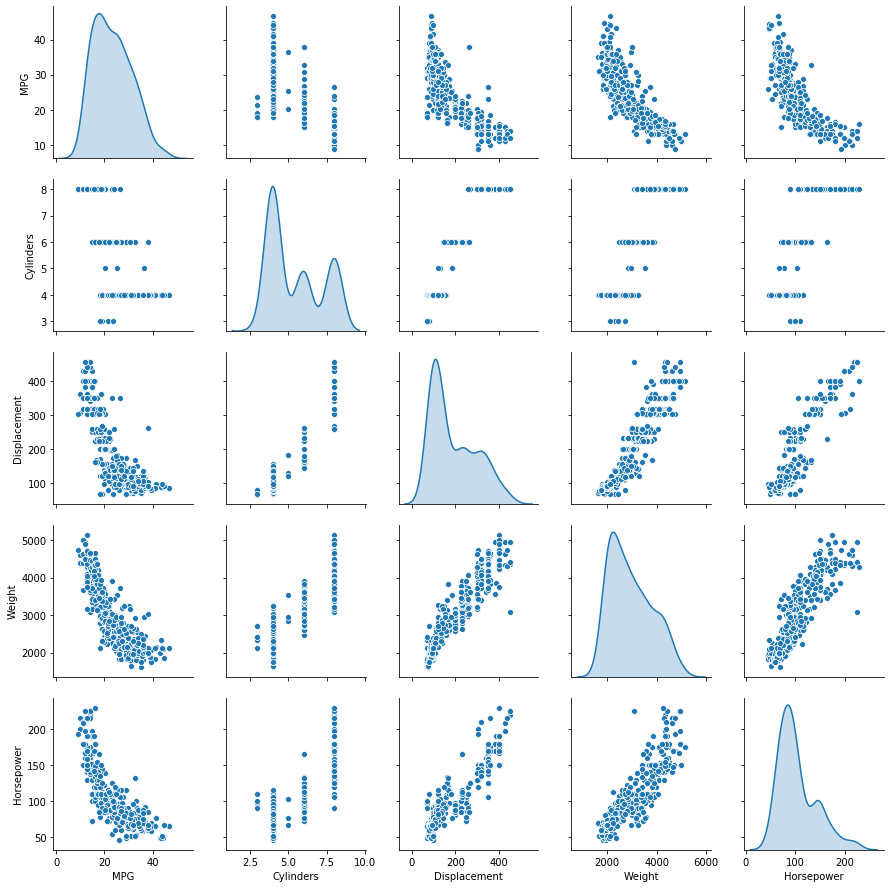

In [7]:
sns.pairplot(raw_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde');

## Data Preparation

In [8]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')

# train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# split data from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

# - to here was done in the test data! 

## Preprocessing Pipeline

In [9]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[   5.477707    195.31847     104.86943    2990.2517       15.559236
   75.89809       0.17834395    0.19745223    0.6242038 ]


In [10]:
x = train_features[:1].values # np.array(X_train_features[:1])
x_normalizer = normalizer(x).numpy()

with np.printoptions(precision=2, suppress=True):
    print('x:', x)
    print('x_nor', x_normalizer)

x: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
x_nor [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


## Linear Regression (single input)

In [11]:
horsepower_normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(train_features['Horsepower'].values)

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [12]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [13]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 2.26 s


In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804951,4.175797,95
96,3.807716,4.158479,96
97,3.806001,4.195064,97
98,3.804566,4.207579,98
99,3.805325,4.198057,99


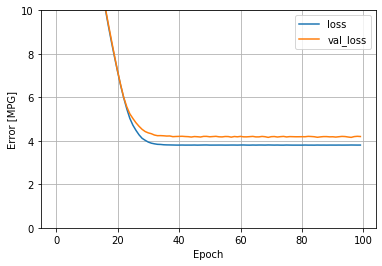

In [15]:
def plot_loss(history):
      plt.plot(history.history['loss'], label='loss')
      plt.plot(history.history['val_loss'], label='val_loss')
      plt.ylim([0, 10])
      plt.xlabel('Epoch')
      plt.ylabel('Error [MPG]')
      plt.legend()
      plt.grid(True)

plot_loss(history)

In [18]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

test_results

{'horsepower_model': 3.631840229034424}

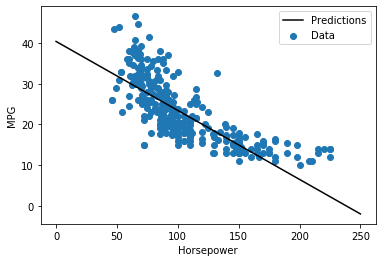

In [19]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

plot_horsepower(x,y)

## Linear Regression (multiple input)

In [36]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(train_features.values)

linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

print(linear_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_13 (Normalizat (None, 9)                 19        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 10        
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________
None


In [37]:
linear_model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [38]:
%%time
history = linear_model.fit(
            train_features, train_labels,
            epochs=100,
            verbose=0,
            validation_split=0.2
)

Wall time: 3.14 s


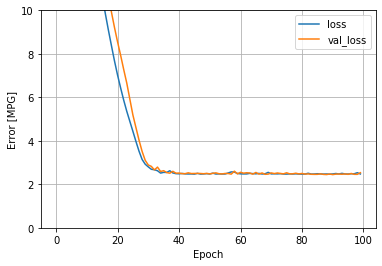

In [39]:
plot_loss(history)

In [40]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## DNN Regression

In [46]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_13 (Normalizat (None, 9)                 19        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [48]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.31 s


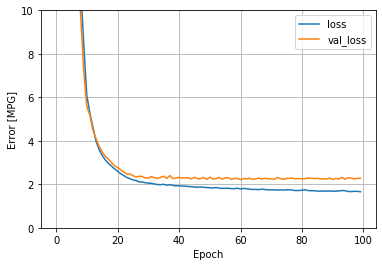

In [49]:
plot_loss(history)

In [50]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [51]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.631840
linear_model,2.580048
dnn_model,1.680598


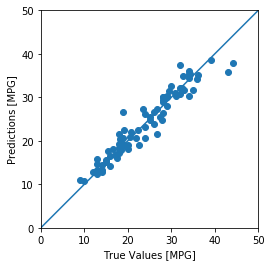

In [52]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

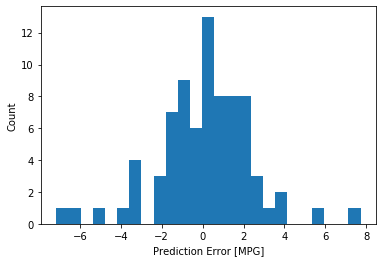

In [53]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [56]:
path = "dnn_model"
model = keras.models.load_model(path) # or tf.saved_model.load(path)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [57]:
test_results['reloaded'] = model.evaluate(
    test_features, test_labels, verbose=0)

In [58]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.631840
linear_model,2.580048
dnn_model,1.680598
reloaded,1.763060
